<a href="https://colab.research.google.com/github/AyeCharm7/MMDT_2025_MLAI101/blob/AyeCharm/AyeCharm/Regression/Lab1_grad_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

df=pd.read_csv('/content/Advertising.csv', index_col = 0)
df.columns


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
sel_program = 'radio'
X=df[[sel_program]]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
#X = np.array((X-X.mean())/X.std())

X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [8]:
def initialize(dim):
    b=random.random()
    a=np.random.rand(dim)
    return b,a

In [9]:
def predict_Y(b,a,X):
    return b + np.dot(X,a)

In [10]:
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)

In [11]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [12]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance = 1e-06
    b,theta=initialize(X.shape[1])

    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0

    for iter_num in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]
        result_idx=result_idx+1
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break
        prev_cost = this_cost
    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

print(gd_iterations_df)

     iteration   value_b  value_weight      cost
0          0.0  0.958742      0.442846  1.640140
1          1.0  0.939567      0.445501  1.601514
2          2.0  0.920776      0.448102  1.564417
3          3.0  0.902360      0.450652  1.528788
4          4.0  0.884313      0.453150  1.494571
..         ...       ...           ...       ...
259      259.0  0.005120      0.575491  0.664656
260      260.0  0.005017      0.575506  0.664654
261      261.0  0.004917      0.575520  0.664653
262      262.0  0.004819      0.575534  0.664652
263      263.0  0.004722      0.575548  0.664651

[264 rows x 4 columns]


In [13]:
#sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")

In [14]:
idx = gd_iterations_df['cost'].argmin()
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]
best_parameters['value_weight']


np.float64(0.5755477501585335)

In [15]:
x = df[sel_program]
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
y_hat = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x

In [16]:
import numpy as np

y_p = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*X
error = np.sum(np.abs(Y- y_p[sel_program]))/len(Y)
print(sel_program, error, get_cost(Y, y_p[sel_program]))

np.sum(((np.abs(Y- y_p[sel_program]))>0.5))


radio 0.6357748559413252 0.6646504606754351


np.int64(100)

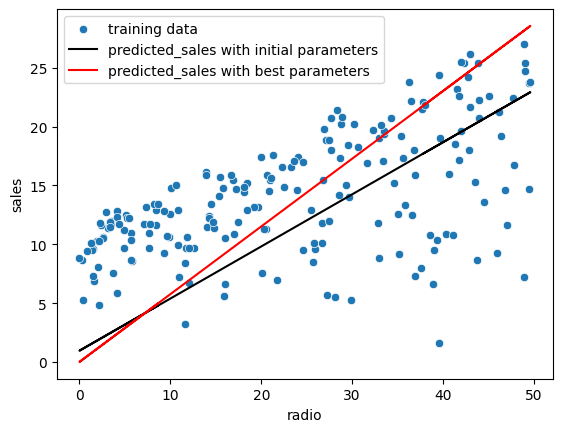

In [17]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_hat, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()